In [8]:
using Pkg
lst = ["Surrogates", "Plots", "Zygote", "Flux", "SurrogatesFlux", "PrettyTables", "BenchmarkTools", "SurrogatesMOE"]
for pkg in lst
    Pkg.add(pkg)
end

   Resolving package versions...
   Installed RealDot ───────────── v0.1.0
   Installed ExtendableSparse ──── v1.4.0
   Installed IRTools ───────────── v0.4.12
   Installed GLM ───────────────── v1.9.0
   Installed GPUArrays ─────────── v10.1.0
   Installed ILUZero ───────────── v0.2.0
   Installed Zygote ────────────── v0.6.69
   Installed Surrogates ────────── v6.9.0
   Installed LLVM ──────────────── v6.6.3
   Installed AbstractFFTs ──────── v1.5.0
   Installed LLVMExtra_jll ─────── v0.0.29+0
   Installed StatsModels ───────── v0.7.3
   Installed SparseInverseSubset ─ v0.1.2
   Installed ChainRules ────────── v1.63.0
   Installed ShiftedArrays ─────── v2.0.0
   Installed StructArrays ──────── v0.6.18
   Installed ChainRulesCore ────── v1.23.0
    Updating `C:\Users\mridu\AppData\Local\Temp\jl_4hvakd\Project.toml`
  [6fc51010] + Surrogates v6.9.0
    Updating `C:\Users\mridu\AppData\Local\Temp\jl_4hvakd\Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [7d9f7c33] + Accessors v0.1.3

In [7]:
using Pkg
Pkg.build("SpecialFunctions")

# using Pkg
# pkg"activate --temp"
# pkg"add Plots"

In [9]:
using Surrogates
using Plots
using Zygote
using Flux
using SurrogatesFlux
using PrettyTables
using BenchmarkTools
using SurrogatesMOE


In [12]:
function sphere_function(x)
    return sum(x.^2)
end

sphere_function (generic function with 1 method)

In [13]:
# Define parameters for training and test data
n_train = 50
n_test = 50
lower_bound = [0.0, 0.0]
upper_bound = [8.0, 8.0]

2-element Vector{Float64}:
 8.0
 8.0

In [14]:
x_train = sample(n_train, lower_bound, upper_bound, SobolSample())  # Sample training data points
y_train = sphere_function.(x_train)  # Calculate corresponding function values
x_test = sample(n_test, lower_bound, upper_bound, RandomSample())
y_test = sphere_function.(x_test)

50-element Vector{Float64}:
  45.717870715930175
  42.22162509271176
   7.723402323844664
 101.93920365385219
  39.44295176200577
  51.944519910905726
  33.778666451301156
  29.365477115123404
  12.264102023996832
  15.002008559565082
   ⋮
  62.891217513546636
  15.416612632719776
  67.50861225102489
  62.41491172256871
  44.76028949327045
  70.92402652937591
   9.091999948511214
  76.01811057664415
  43.84470213926873

In [51]:
x_train

100-element Vector{Tuple{Float64, Float64}}:
 (0.1875, 3.1875)
 (4.1875, 7.1875)
 (6.1875, 1.1875)
 (2.1875, 5.1875)
 (3.1875, 0.1875)
 (7.1875, 4.1875)
 (5.1875, 2.1875)
 (1.1875, 6.1875)
 (1.6875, 1.6875)
 (5.6875, 5.6875)
 ⋮
 (3.34375, 5.90625)
 (2.34375, 0.90625)
 (6.34375, 4.90625)
 (4.34375, 2.90625)
 (0.34375, 6.90625)
 (0.46875, 0.53125)
 (4.46875, 4.53125)
 (6.46875, 2.53125)
 (2.46875, 6.53125)

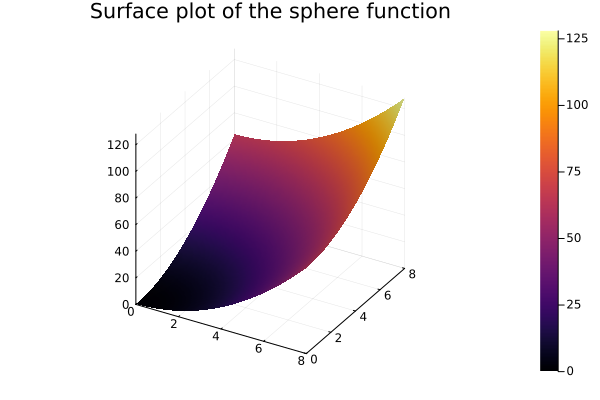

In [15]:
## Plotting the surface plot of the sphere function

# Create a grid of points within your bounds
x = range(lower_bound[1], stop=upper_bound[1], length=100)
y = range(lower_bound[2], stop=upper_bound[2], length=100)

# Evaluate the sphere function at these points
Z = [sphere_function([xi, yi]) for xi in x, yi in y]

# Create the surface plot
surface(x, y, Z, title="Surface plot of the sphere function")

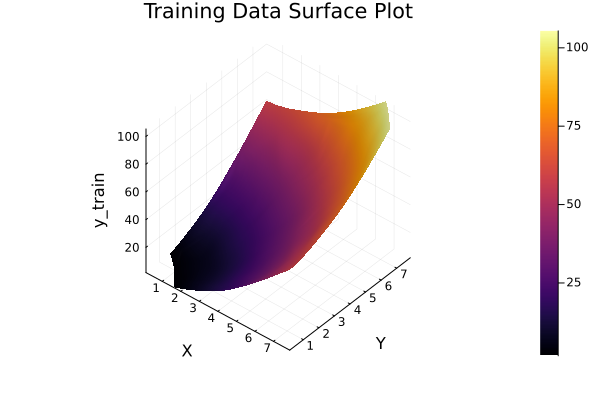

In [16]:
## Plotting the training Data


# Access individual elements using single-dimension indexing:
x1_train = [x_train[i][1] for i in 1:length(x_train)]
x2_train = [x_train[i][2] for i in 1:length(x_train)]
x1_test = [x_test[i][1] for i in 1:length(x_test)]
x2_test = [x_test[i][2] for i in 1:length(x_test)]

# training Plots
p1 = surface(x1_train, x2_train, y_train, st=:surface,
    camera=(40, 40), xlabel="X", ylabel="Y", zlabel="y_train",
    title="Training Data Surface Plot")

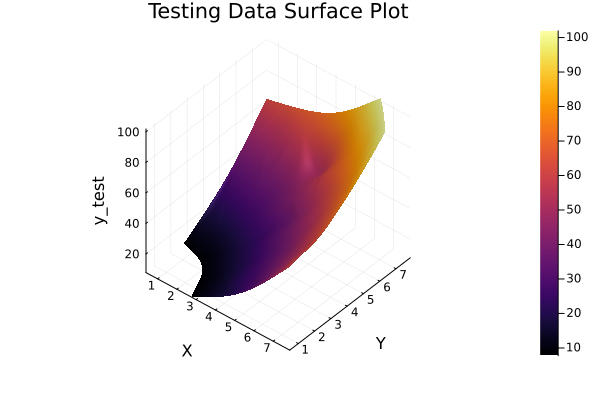

In [17]:
# Testing plot
p2 = surface(x1_test, x2_test, y_test, st=:surface,
    camera=(40, 40), xlabel="X", ylabel="Y", zlabel="y_test",
    title="Testing Data Surface Plot")

In [57]:
x_train

100-element Vector{Tuple{Float64, Float64}}:
 (0.1875, 3.1875)
 (4.1875, 7.1875)
 (6.1875, 1.1875)
 (2.1875, 5.1875)
 (3.1875, 0.1875)
 (7.1875, 4.1875)
 (5.1875, 2.1875)
 (1.1875, 6.1875)
 (1.6875, 1.6875)
 (5.6875, 5.6875)
 ⋮
 (3.34375, 5.90625)
 (2.34375, 0.90625)
 (6.34375, 4.90625)
 (4.34375, 2.90625)
 (0.34375, 6.90625)
 (0.46875, 0.53125)
 (4.46875, 4.53125)
 (6.46875, 2.53125)
 (2.46875, 6.53125)

In [58]:
y_train

100-element Vector{Float64}:
 10.1953125
 69.1953125
 39.6953125
 31.6953125
 10.1953125
 69.1953125
 31.6953125
 39.6953125
  5.6953125
 64.6953125
  ⋮
 46.064453125
  6.314453125
 64.314453125
 27.314453125
 47.814453125
  0.501953125
 40.501953125
 48.251953125
 48.751953125

In [86]:
using Statistics

# Define the function for normalization
function normalize_data(data::Vector{<:Tuple{<:Real, <:Real}})
    x_values = [x[1] for x in data]
    y_values = [x[2] for x in data]
    x_min, x_max = minimum(x_values), maximum(x_values)
    y_min, y_max = minimum(y_values), maximum(y_values)
    
    normalized_data = [[(x[1] - x_min) / (x_max - x_min), (x[2] - y_min) / (y_max - y_min)] for x in data]
    return normalized_data, (x_min, x_max), (y_min, y_max)
end

# Define the function for denormalization
function denormalize_data(data::Vector{<:Tuple{<:Real, <:Real}}, x_range::Tuple{<:Real, <:Real}, y_range::Tuple{<:Real, <:Real})
    x_min, x_max = x_range
    y_min, y_max = y_range
                                                                                                                                                                                                                                                                                 
    denormalized_data = [(x[1] * (x_max - x_min) + x_min, x[2] * (y_max - y_min) + y_min) for x in data]
    
    return denormalized_data
end

# Normalize the training data before creating the NeuralSurrogate
normalized_x_train, x_range, y_range = normalize_data(x_train)
# Perform any further processing, such as training the model using normalized data

# Create the NeuralSurrogate using the normalized data
neural_surrogate = NeuralSurrogate(normalized_x_train, y_train, lower_bound, upper_bound, model = model1, n_echos = 5000)


┌ Info: Epoch 1
└ @ SurrogatesFlux C:\Users\mridu\.julia\packages\Flux\n3cOc\src\optimise\train.jl:185


DimensionMismatch: DimensionMismatch: layer BatchNorm(5) expects ndims(input) > 1, but got 5-element Vector{Float32}

In [23]:
model1 = Chain(
    Dense(2, 5, σ),
    Dense(5, 2, σ),
    Dense(2, 1)
)
neural_surrogate = NeuralSurrogate(x_train, y_train, lower_bound, upper_bound, model = model1, n_echos = 5000)



# For Lobachevsky
# Loba_Surrogate = LobachevskySurrogate(x_train, y_train,  lower_bound, upper_bound, alpha = [0.8,0.8], n=12)
# For GEKPLS
# GEKPLS_surrogate = GEKPLS(x_train, y_train, grads, n_comp, delta_x, lower_bound, upper_bound, extra_points, initial_theta)
# For Neural Surrogate
# # For Gradient Enhanced Kriging
# GEK_Surrogate = GEK(x_train, y_train, lower_bound, upper_bound, p=[1.9, 1.9])

# For MOE
# moe_surrogate = MOE(x1_train, y_train, expert_types)
# For radial basis

# radial_surrogate = RadialBasis(x_train, y_train, lower_bound, upper_bound)

In [56]:
x_train_values = [x[1:2] for x in x_train]


50-element Vector{Tuple{Float64, Float64}}:
 (0.375, 2.125)
 (4.375, 6.125)
 (6.375, 0.125)
 (2.375, 4.125)
 (3.375, 1.125)
 (7.375, 5.125)
 (5.375, 3.125)
 (1.375, 7.125)
 (1.875, 0.625)
 (5.875, 4.625)
 ⋮
 (5.6875, 5.6875)
 (7.6875, 3.6875)
 (3.6875, 7.6875)
 (2.6875, 2.6875)
 (6.6875, 6.6875)
 (4.6875, 0.6875)
 (0.6875, 4.6875)
 (0.9375, 0.9375)
 (4.9375, 4.9375)

In [57]:
x_test_values = [x[1:2] for x in x_test]


50-element Vector{Tuple{Float64, Float64}}:
 (0.9597740290983712, 0.8087267536457476)
 (3.626522650388207, 6.505410214959871)
 (6.129362450481315, 4.986807618253069)
 (3.0887853468681232, 2.3571347541991825)
 (2.0031641676807466, 5.992877525266567)
 (7.422812511184459, 4.588586359843667)
 (4.546096934072568, 5.263645023821295)
 (3.4747522465824767, 6.983999505899247)
 (3.8879515025824096, 5.688730477268414)
 (1.966141044706828, 1.6501595163873723)
 ⋮
 (5.790647514911121, 1.270859271845775)
 (6.506716825008598, 2.2344458852105635)
 (5.049747307847608, 7.290153073986345)
 (4.624959763981285, 5.1134502313784225)
 (5.303583178878432, 4.2950315340953455)
 (5.143591718818706, 7.658243289397264)
 (5.7534382130404875, 6.9359145201886605)
 (0.21125272760860891, 6.28363932224757)
 (1.5242800077238323, 5.446154661433291)

In [58]:
## Predictions on training and test data

## Training data
# loba_surrogate_train = Loba_Surrogate.(x_train_values)
GEKPLS_surrogate_train = GEKPLS_surrogate.(x_train_values)
neural_surrogate_train = neural_surrogate.(x_train_values)
# GEK_Surrogate_train = GEK_Surrogate.(x_train_values)
# moe_surrogate_train = moe_surrogate.(x1_train)
radial_surrogate_train = radial_surrogate.(x_train_values)


## Test data
# loba_surrogate_test = Loba_Surrogate.(x_test_values)
GEKPLS_surrogate_test = GEKPLS_surrogate.(x_test_values)
neural_surrogate_test = neural_surrogate.(x_test_values)
# GEK_Surrogate_test = GEK_Surrogate.(x_test_values)
# moe_surrogate_test = moe_surrogate.(x1_test)
radial_surrogate_test = radial_surrogate.(x_test_values)


50-element Vector{Float64}:
  2.2769763495889235
 55.67683092528996
 62.66521826720648
 15.026453272805062
 40.21170237364776
 75.97470642496963
 48.43874409433269
 61.26764039330803
 47.5847485856793
  6.370814093048548
  ⋮
 35.16073278403761
 47.84971835370597
 78.74377701140234
 47.60008729421603
 46.663615668647616
 84.46129516608585
 81.75988185971109
 39.61167698868579
 32.0085849376643

In [59]:
## Define the MSE function
function calculate_mse(predictions, true_values)
    return mean((predictions .- true_values) .^ 2)  # Calculate mean of squared errors
end

calculate_mse (generic function with 1 method)

In [60]:
## Calculate MSE for training data
# loba_surrogate_train_mse = calculate_mse(loba_surrogate_train, y_train)
GEKPLS_surrogate_train_mse = calculate_mse(GEKPLS_surrogate_train, y_train)
neural_surrogate_train_mse = calculate_mse(neural_surrogate_train, y_train)
# GEK_Surrogate_train_mse = calculate_mse(GEK_Surrogate_train, y_train)
# moe_surrogate_train_mse = calculate_mse(moe_surrogate_train, y_train)
radial_surrogate_train_mse = calculate_mse(radial_surrogate_train, y_train)

## Calculate MSE for test data
# loba_surrogate_test_mse = calculate_mse(loba_surrogate_test, y_test)
GEKPLS_surrogate_test_mse = calculate_mse(GEKPLS_surrogate_test, y_test)
neural_surrogate_test_mse = calculate_mse(neural_surrogate_test, y_test)
# GEK_Surrogate_test_mse = calculate_mse(GEK_Surrogate_test, y_test)
# moe_surrogate_test_mse = calculate_mse(moe_surrogate_test, y_test)
radial_surrogate_test_mse = calculate_mse(radial_surrogate_test, y_test)

2.01795446874777

In [61]:
## Compare MSE
models = ["GEKPLS", "Neural", "Raidal_Basis"]
train_mses = [GEKPLS_surrogate_train_mse, neural_surrogate_train_mse, radial_surrogate_train_mse]
test_mses = [GEKPLS_surrogate_test_mse, neural_surrogate_test_mse, radial_surrogate_test_mse]
mses = sort(collect(zip(test_mses, train_mses, models)))
pretty_table(hcat(getindex.(mses, 3), getindex.(mses, 2), getindex.(mses, 1)), header=["Model", "Training MSE", "Test MSE"])

In [62]:
pretty_table(hcat(getindex.(mses, 3), getindex.(mses, 2), getindex.(mses, 1)), header=["Model", "Training MSE", "Test MSE"])


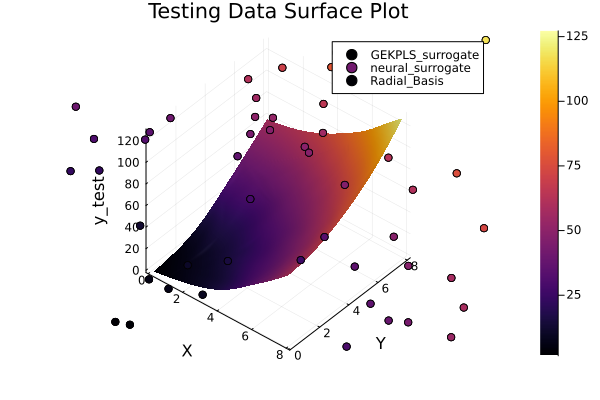

In [63]:
x_values = [point[1] for point in x_test]
y_values = [point[2] for point in x_test]

## Plot predictions of Loba_Surrogate
# scatter!(x_values, y_values, zcolor=loba_surrogate_test, label="Loba_Surrogate", color=:purple, legend=:bottomright)

# Plot predictions of GEKPLS_surrogate
scatter!(x_values, y_values, zcolor=GEKPLS_surrogate_test, label="GEKPLS_surrogate", color=:green, legend=:bottomright)

# Plot predictions of neural_surrogate
scatter!(x_values, y_values, zcolor=neural_surrogate_test, label="neural_surrogate", color=:orange, legend=:bottomright)

# Plot predictions of GEK_Surrogate
# scatter!(x_values, y_values, zcolor=GEK_Surrogate_test, label="GEK_Surrogate", color=:cyan, legend=:bottomright)

# Plot predictions of MOE
# scatter!(x_values, y_values, zcolor=moe_surrogate_test, label="MOE", color=:red, legend=:bottomright)

#Plot for radial basis
scatter!(x_values, y_values, zcolor=radial_surrogate_test, label="Radial_Basis", color=:blue, legend=:topright)

# Display the plot
plot!()

In [64]:
# Time evaluation for the original function
time_original = @belapsed sphere_function.(x_test_values)

# Time evaluation for Loba_Surrogate
# time_loba_surrogate = @belapsed Loba_Surrogate.(x_test_values)

# Time evaluation for GEKPLS_surrogate
time_GEKPLS_surrogate = @belapsed GEKPLS_surrogate.(x_test_values)

# Time evaluation for neural_surrogate
time_neural_surrogate = @belapsed neural_surrogate.(x_test_values)

# Time evaluation for GEK_Surrogate
# time_GEK_Surrogate = @belapsed GEK_Surrogate.(x_test_values)

# Time evaluation for MOE
# time_moe_surrogate = @belapsed moe_surrogate.(x1_test)

# Time evaluation for radial basis
time_radial_surrogate = @belapsed radial_surrogate.(x_test_values)

In [ ]:
## Compare time performance

times = ["GEKPLS_surrogate" => time_GEKPLS_surrogate, "Neural" => "Original Function" => time_original]
sorted_times = sort(times, by=x -> x[2])
pretty_table(hcat(first.(sorted_times), last.(sorted_times)), header=["Model", "Time(s)"])